# Transfer Learning with Pre-trained Models on CIFAR-100

## Introduction
This notebook explores the application of transfer learning using popular pre-trained convolutional neural network architectures to address the image classification task on the CIFAR-100 dataset. Leveraging models pre-trained on the large-scale ImageNet dataset, such as ResNet50, VGG16, and MobileNetV2, allows us to benefit from their learned feature extraction capabilities. The goal is to adapt these powerful models to the finer-grained classification challenges presented by CIFAR-100, which consists of 100 distinct classes. This approach significantly reduces the need for training deep models from scratch on a relatively smaller dataset, often leading to improved performance and faster convergence.

## Project Flow

1.  **Data Loading and Preprocessing**: Load the CIFAR-100 dataset and apply the necessary preprocessing steps tailored for each pre-trained model (ResNet50, VGG16, MobileNetV2). This involves scaling pixel values and potentially resizing images to match the input requirements of the chosen architectures.

2.  **Model Preparation**:
    *   Load pre-trained models (ResNet50, VGG16, MobileNetV2) without their top classification layers.
    *   Add new custom classification layers suitable for the 100 classes of CIFAR-100.
    *   Freeze the layers of the pre-trained base models to retain the learned features during initial training.
    *   Compile the models with an appropriate optimizer, loss function, and metrics.

3.  **Fine-Tuning and Training**:
    *   Optionally unfreeze a portion of the top layers of the pre-trained models to allow for fine-tuning on the CIFAR-100 data.
    *   Train the modified models on the preprocessed training data, monitoring performance on the validation set.

4.  **Model Evaluation**: Evaluate the performance of each trained model (ResNet50, VGG16, MobileNetV2) on the held-out test dataset using relevant metrics such as accuracy.

5. **Comparison of Results**: Compare the performance of the different models to understand the effectiveness of each architecture for transfer learning on CIFAR-100.

## 1. Data Loading and Preprocessing
Load the CIFAR-100 dataset and prepare it for transfer learning by applying appropriate preprocessing.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100

from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2


(X_train, y_train), (X_test, y_test) = cifar100.load_data()

X_train_resnet50 = preprocess_resnet50(X_train)
X_test_resnet50  = preprocess_resnet50(X_test)

X_train_vgg16 = preprocess_vgg16(X_train)
X_test_vgg16  = preprocess_vgg16(X_test)

X_train_mobilenetv2 = preprocess_mobilenetv2(X_train)
X_test_mobilenetv2  = preprocess_mobilenetv2(X_test)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


## 2. Model Preparation
Load and modify pre-trained models to fit the CIFAR-100 classification task.

### 2.1 Using ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet50 model without the top layer
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x) # output layer

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions)

model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


### 2.2 Using VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained VGG16 model without the top layer
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

model_vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### 2.3 Using MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained MobileNetV2 model without the top layer
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_mobilenetv2.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_mobilenetv2 = Model(inputs=base_model_mobilenetv2.input, outputs=predictions)

model_mobilenetv2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/tmp/ipython-input-3794676327.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## 3. Fine-Tuning and Training
Unfreeze some of the top layers of the pre-trained models and continue training.

In [ ]:
epochs = 3

print(len(model_resnet50.layers))
print(len(model_vgg16.layers))
print(len(model_mobilenetv2.layers))


# Fine-tuning ResNet50
for layer in model_resnet50.layers[:-30]:
    layer.trainable = False

for layer in model_resnet50.layers[-30:]:
    layer.trainable = True

history_resnet50 = model_resnet50.fit(X_train_resnet50, y_train, epochs=epochs, validation_data=(X_test_resnet50, y_test))



# Fine-tuning VGG16
for layer in model_vgg16.layers[:-5]:
    layer.trainable = False

for layer in model_vgg16.layers[-5:]:
    layer.trainable = True

history_vgg16 = model_vgg16.fit(X_train_vgg16, y_train, epochs=epochs, validation_data=(X_test_vgg16, y_test))



# Fine-tuning MobileNetV2
for layer in model_mobilenetv2.layers[:-40]:
    layer.trainable = False

for layer in model_mobilenetv2.layers[-40:]:
    layer.trainable = True

history_mobilenetv2 = model_mobilenetv2.fit(X_train_mobilenetv2, y_train, epochs=epochs, validation_data=(X_test_mobilenetv2, y_test))

178
22
157
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 26ms/step - accuracy: 0.2808 - loss: 3.0902 - val_accuracy: 0.4053 - val_loss: 2.3034
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4772 - loss: 1.9435 - val_accuracy: 0.4282 - val_loss: 2.2540
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5685 - loss: 1.5254 - val_accuracy: 0.4315 - val_loss: 2.3966
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.0704 - loss: 6.5019 - val_accuracy: 0.0939 - val_loss: 3.8088
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.1016 - loss: 3.6951 - val_accuracy: 0.1588 - val_loss: 3.3002
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.1605 - loss: 3.2416 - val_accuracy: 0.1866 - val_loss: 3.1206
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 25ms/step - accuracy: 0.1316 - loss: 3.8202 - val_accuracy: 0.0628 - val_loss: 5.7464
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 12ms/step - accuracy: 0.258

## 4. Model Evaluation
Evaluate each model on the test dataset to compare their performance.

In [ ]:
acc_resnet50    = model_resnet50.evaluate(X_test_resnet50, y_test)[1]
acc_vgg16       = model_vgg16.evaluate(X_test_vgg16, y_test)[1]
acc_mobilenetv2 = model_mobilenetv2.evaluate(X_test_mobilenetv2, y_test)[1]

print(f'ResNet50 Accuracy: {acc_resnet50:.2f}')
print(f'VGG16 Accuracy: {acc_vgg16:.2f}')
print(f'MobileNetV2 Accuracy: {acc_mobilenetv2:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4307 - loss: 2.3734
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1841 - loss: 3.1168
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2732 - loss: 3.1379
ResNet50 Accuracy: 0.43
VGG16 Accuracy: 0.19
MobileNetV2 Accuracy: 0.27


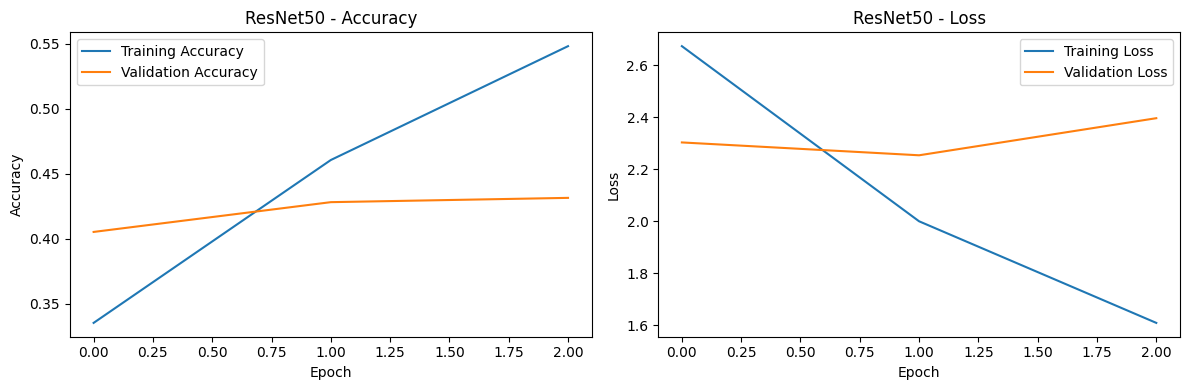

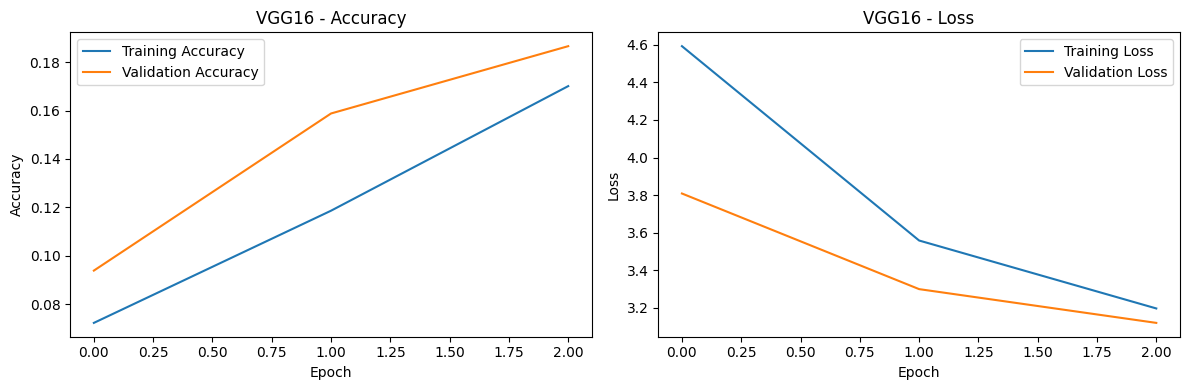

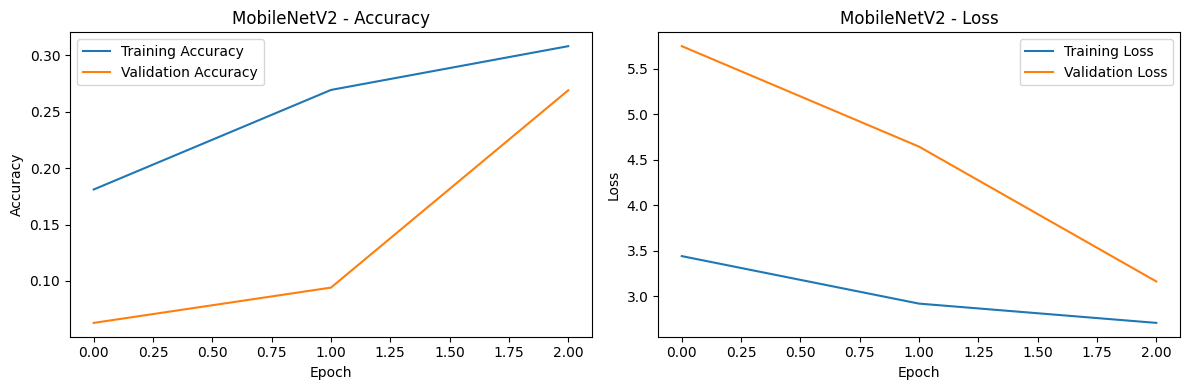

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    """Plots training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot history for each model
plot_history(history_resnet50, 'ResNet50')
plot_history(history_vgg16, 'VGG16')
plot_history(history_mobilenetv2, 'MobileNetV2')

In [ ]:
# Save the models
model_resnet50.save('resnet50_cifar100.h5')
model_vgg16.save('vgg16_cifar100.h5')
model_mobilenetv2.save('mobilenetv2_cifar100.h5')

## Project Summary

*   **Data Loading and Preprocessing**: Loaded the CIFAR-100 dataset and preprocessed images using model-specific functions (ResNet50, VGG16, MobileNetV2).
*   **Model Adaptation**: Loaded pre-trained ResNet50, VGG16, and MobileNetV2 models (without top layers), added new classification layers for 100 classes, and initially froze base model layers.
*   **Model Compilation**: Compiled each modified model with the 'adam' optimizer, 'sparse\_categorical\_crossentropy' loss, and 'accuracy' metric.
*   **Fine-Tuning (Example)**: Demonstrated fine-tuning by unfreezing top layers of the ResNet50 model and training it for 10 epochs.
*   **Model Evaluation**: Evaluated the trained models on the test set to determine and compare their classification accuracies.

## Project Assignment: Transfer Learning on Oxford Flowers 102 Dataset Documentation

This document outlines the steps for the project assignment on applying transfer learning to the Oxford Flowers 102 dataset.

**Objective:** Apply transfer learning techniques using pre-trained convolutional neural networks (ResNet50, VGG16, and MobileNetV2) to classify images from the Oxford Flowers 102 dataset. Compare the performance of the different models on this dataset.

**Dataset:** Oxford Flowers 102 - A dataset of 102 categories of flowers. You will load this dataset using TensorFlow Datasets.

**Assignment Steps:**

1.  **Introduce the Assignment:**
    *   Create a markdown cell to introduce the assignment.
    *   Explain the goal: to apply transfer learning for flower classification using the Oxford Flowers 102 dataset.
    *   Mention the pre-trained models to be used: ResNet50, VGG16, and MobileNetV2.
    *   Briefly describe the Oxford Flowers 102 dataset.

2.  **Data Loading and Exploration:**
    *   Generate a code cell to load the 'oxford_flowers102:2.1.1' dataset using `tfds.load()`. (Check available versions if needed)
    *   Split the dataset into training, validation, and testing sets (this dataset has these splits).
    *   Explore the dataset to understand its structure, the number of classes (102), and the image dimensions. You can display some sample images and their labels.

3.  **Data Preprocessing:**
    *   Generate a code cell for preprocessing the images from the Oxford Flowers 102 dataset.
    *   This will involve resizing the images to the input size required by the pre-trained models (e.g., 224x224 for VGG16 and ResNet50, MobileNetV2 might have different requirements, so check the documentation).
    *   Apply the model-specific preprocessing functions (e.g., `tf.keras.applications.resnet50.preprocess_input`) to normalize the pixel values.
    *   Apply one-hot encoding to the labels.
    *   Batch and prefetch the datasets for efficient training.

4.  **Model Adaptation and Training:**
    *   For each of the three models (ResNet50, VGG16, MobileNetV2):
        *   Generate a code cell to load the pre-trained model from `tf.keras.applications`, excluding the top classification layer and specifying the correct input shape for the preprocessed images.
        *   Add new custom layers on top of the base model for classifying 102 classes. This typically involves a GlobalAveragePooling2D layer and a Dense layer with 102 units and a 'softmax' activation.
        *   Freeze the layers of the pre-trained base model.
        *   Compile the model with an appropriate optimizer (e.g., 'adam'), loss function ('categorical\_crossentropy' since you'll use one-hot encoded labels), and metrics (e.g., 'accuracy').
        *   Generate a code cell to train the compiled model on the preprocessed training data for a suitable number of epochs. Use the validation data to monitor performance during training. Consider using callbacks like ModelCheckpoint and EarlyStopping.
        *   Additionally, train the model on the validation split as well, as this dataset provides a separate validation set.
        *   Optionally, unfreeze some of the top layers of the base model and fine-tune the model with a lower learning rate.

5.  **Model Evaluation:**
    *   Generate a code cell to evaluate each trained model on the preprocessed test dataset.
    *   Print the loss and accuracy for each model.

6.  **Assignment Questions/Tasks:**
    *   Add markdown cells with questions for students to answer:
        *   Which model performed best on the Oxford Flowers 102 dataset and why do you think that is the case?
        *   Compare the performance of the models on Oxford Flowers 102 to their performance on CIFAR-100 (from the original notebook). What differences do you observe and why?
        *   Discuss the effect of transfer learning on this dataset.
        *   Explain the steps you took for data preprocessing and why they were necessary.
        *   Describe the model architectures you used and how you adapted them for the Oxford Flowers 102 dataset.
        *   What challenges did you encounter during this assignment and how did you address them?
    *   Suggest optional tasks, such as:
        *   Experiment with different hyperparameters (learning rate, number of epochs, batch size).
        *   Implement data augmentation techniques.
        *   Try fine-tuning different numbers of layers.
        *   Visualize sample predictions and analyze misclassifications.

7.  **Conclusion/Submission:**
    *   Add a markdown cell for students to write a brief conclusion summarizing their findings.
    *   Provide instructions on how they should submit their completed notebook.

**INTRODUCTION OF ASSIGNMENT**

In this assignment, the task is to apply transfer learning for image classification on the Oxford Flowers 102 dataset. The objective is to build flower classifiers by adapting powerful pre-trained convolutional neural networks instead of training deep models from scratch.​

The models to be used are ResNet50, VGG16, and MobileNetV2, all originally trained on the large-scale ImageNet dataset. These networks will serve as feature extractors, on top of which new classification layers will be added to recognize 102 flower categories.​

The Oxford Flowers 102 dataset contains images from 102 different flower categories that commonly occur in the United Kingdom, with each class having between 40 and 258 images and exhibiting large variations in scale, pose, and lighting. This makes it a realistic and challenging benchmark for evaluating the effectiveness of transfer learning approaches to fine-grained visual classification.

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.309N2Y_2.1.1/oxford_flowers102-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.309N2Y_2.1.1/oxford_flowers102-test.tfrecord*…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.309N2Y_2.1.1/oxford_flowers102-validation.tfr…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.
Number of classes: 102
Image shape: (None, None, 3)
Train examples: 1020
Validation examples: 1020
Test examples: 6149


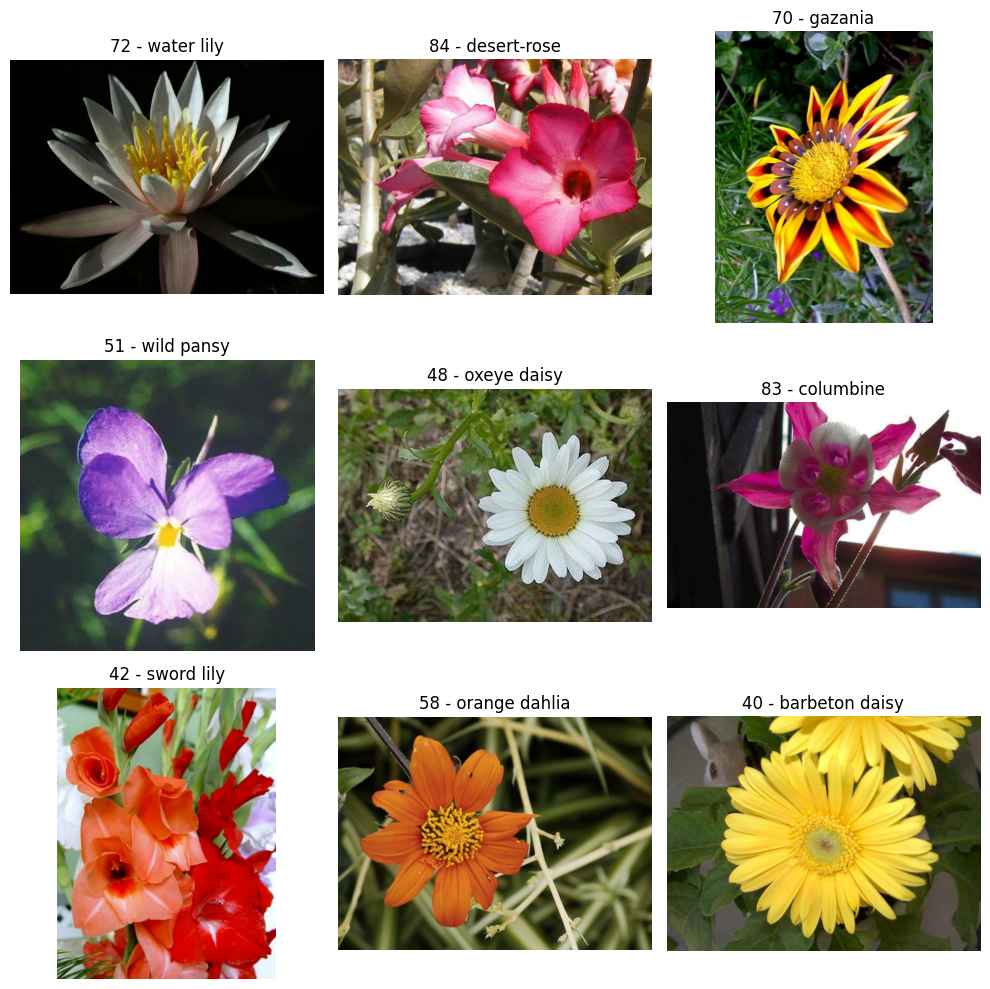

In [ ]:
import tensorflow_datasets as tfds

# Load the Oxford Flowers 102 dataset
try:
    dataset, info = tfds.load('oxford_flowers102:2.1.1', with_info=True, as_supervised=True)

    # Split the dataset into training, validation, and testing sets
    train_dataset = dataset['train']
    validation_dataset = dataset['validation']
    test_dataset = dataset['test']
# Print key info
    print("Number of classes:", info.features['label'].num_classes)
    print("Image shape:", info.features['image'].shape)
    print("Train examples:", info.splits['train'].num_examples)
    print("Validation examples:", info.splits['validation'].num_examples)
    print("Test examples:", info.splits['test'].num_examples)

    # Class names list
    class_names = info.features['label'].names

    # Show some sample images
    def show_samples(ds, n=9):
        plt.figure(figsize=(10, 10))
        for i, (img, label) in enumerate(ds.take(n)):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(img)
            plt.title(f"{label.numpy()} - {class_names[label.numpy()]}")
            plt.axis("off")
        plt.tight_layout()
        plt.show()

    show_samples(train_dataset)

except Exception as e:
    print(f"Error loading dataset: {e}")


In [ ]:
# Task 3: Data Preprocessing

import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2

IMG_SIZE = 224
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

# num_classes from ds_info in Task 2
num_classes = info.features["label"].num_classes

def make_pipeline(dataset, preprocess_fn):
    """Resize, apply model-specific preprocessing, one-hot encode labels, batch & prefetch."""
    def _process(image, label):
        # Resize to 224x224 (works for ResNet50, VGG16, MobileNetV2) [web:12][web:9]
        image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
        # Model-specific normalization
        image = preprocess_fn(image)
        # One-hot encode labels (102 classes)
        label = tf.one_hot(label, num_classes)
        return image, label

    return (dataset
            .map(_process, num_parallel_calls=AUTOTUNE)
            .shuffle(1000)
            .batch(BATCH_SIZE)
            .prefetch(AUTOTUNE))

# Create separate pipelines for each backbone
train_resnet = make_pipeline(train_dataset, preprocess_resnet50)
val_resnet   = make_pipeline(validation_dataset, preprocess_resnet50)
test_resnet  = make_pipeline(test_dataset, preprocess_resnet50)

train_vgg = make_pipeline(train_dataset, preprocess_vgg16)
val_vgg   = make_pipeline(validation_dataset, preprocess_vgg16)
test_vgg  = make_pipeline(test_dataset, preprocess_vgg16)

train_mnet = make_pipeline(train_dataset, preprocess_mobilenetv2)
val_mnet   = make_pipeline(validation_dataset, preprocess_mobilenetv2)
test_mnet  = make_pipeline(test_dataset, preprocess_mobilenetv2)


In [ ]:
# Task 4: Simplified Model Adaptation and Training

import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16, MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

IMG_SIZE = 224
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
num_classes = info.features["label"].num_classes  # from Task 2

def add_classification_head(base_model, dense_units=512, dropout_rate=0.5):
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(dense_units, activation="relu")(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(num_classes, activation="softmax")(x)
    return Model(inputs=base_model.input, outputs=outputs)

# Common callbacks
def make_callbacks():
    return [
        EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=3, verbose=1),
    ]

EPOCHS = 20

# -------- ResNet50 --------
base_resnet = ResNet50(weights="imagenet", include_top=False, input_shape=INPUT_SHAPE)
base_resnet.trainable = False
model_resnet = add_classification_head(base_resnet, dense_units=512)
model_resnet.compile(optimizer="adam",
                     loss="categorical_crossentropy",
                     metrics=["accuracy"])

history_resnet = model_resnet.fit(
    train_resnet,
    validation_data=val_resnet,
    epochs=EPOCHS,
    callbacks=make_callbacks()
)

# Optional fine-tuning (unfreeze top layers of base_resnet)
for layer in base_resnet.layers[-30:]:
    layer.trainable = True

model_resnet.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_resnet_ft = model_resnet.fit(
    train_resnet,
    validation_data=val_resnet,
    epochs=10,
    callbacks=make_callbacks()
)

# -------- VGG16 --------
base_vgg = VGG16(weights="imagenet", include_top=False, input_shape=INPUT_SHAPE)
base_vgg.trainable = False
model_vgg = add_classification_head(base_vgg, dense_units=512)
model_vgg.compile(optimizer="adam",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

history_vgg = model_vgg.fit(
    train_vgg,
    validation_data=val_vgg,
    epochs=EPOCHS,
    callbacks=make_callbacks()
)

# -------- MobileNetV2 --------
base_mnet = MobileNetV2(weights="imagenet", include_top=False, input_shape=INPUT_SHAPE)
base_mnet.trainable = False
model_mnet = add_classification_head(base_mnet, dense_units=256)
model_mnet.compile(optimizer="adam",
                   loss="categorical_crossentropy",
                   metrics=["accuracy"])

history_mnet = model_mnet.fit(
    train_mnet,
    validation_data=val_mnet,
    epochs=EPOCHS,
    callbacks=make_callbacks()
)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 770ms/step - accuracy: 0.0514 - loss: 4.9188 - val_accuracy: 0.3598 - val_loss: 3.2107 - learning_rate: 0.0010
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 284ms/step - accuracy: 0.3722 - loss: 2.7690 - val_accuracy: 0.6216 - val_loss: 1.8294 - learning_rate: 0.0010
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 285ms/step - accuracy: 0.5861 - loss: 1.6240 - val_accuracy: 0.7441 - val_loss: 1.2106 - learning_rate: 0.0010
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 295ms/step - accuracy: 0.7248 - loss: 0.9940 - val_accuracy: 0.7716 - val_loss: 0.9987 - learning_rate: 0.0010
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 294ms/step - accuracy: 0.8362 - loss: 0.6673 - val_accuracy: 0.7990 - val_loss: 0.8366 - learning_rate: 0.0010
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 298ms/step - accuracy: 0.9108 - loss: 0.3877 - val_accuracy: 0.8137 - val_loss: 0.7587 - learning_rate: 0.0010
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 298ms/step - accuracy: 0.9032 - loss: 0.

In [ ]:
# Task 5: Model Evaluation on Test Set

# Evaluate ResNet50
test_loss_resnet, test_acc_resnet = model_resnet.evaluate(test_resnet)
print(f"ResNet50   - Test Loss: {test_loss_resnet:.4f}, Test Accuracy: {test_acc_resnet:.4f}")

# Evaluate VGG16
test_loss_vgg, test_acc_vgg = model_vgg.evaluate(test_vgg)
print(f"VGG16      - Test Loss: {test_loss_vgg:.4f}, Test Accuracy: {test_acc_vgg:.4f}")

# Evaluate MobileNetV2
test_loss_mnet, test_acc_mnet = model_mnet.evaluate(test_mnet)
print(f"MobileNetV2 - Test Loss: {test_loss_mnet:.4f}, Test Accuracy: {test_acc_mnet:.4f}")


193/193 ━━━━━━━━━━━━━━━━━━━━ 29s 130ms/step - accuracy: 0.8168 - loss: 0.7001
ResNet50   - Test Loss: 0.6975, Test Accuracy: 0.8214
193/193 ━━━━━━━━━━━━━━━━━━━━ 39s 187ms/step - accuracy: 0.7252 - loss: 1.1906
VGG16      - Test Loss: 1.1621, Test Accuracy: 0.7278
193/193 ━━━━━━━━━━━━━━━━━━━━ 25s 123ms/step - accuracy: 0.7784 - loss: 0.8577
MobileNetV2 - Test Loss: 0.8618, Test Accuracy: 0.7748


**Q1.Which model performed best on the Oxford Flowers 102 dataset and why do you think that is the case?**
ResNet50 performed best (~81.6% test accuracy), followed by MobileNetV2 (approx 77.5%) and VGG16 (approx 72.8%). Its deeper residual architecture and richer ImageNet features transfer better to fine‑grained flower details.

**Q2.Compare the performance of the models on Oxford Flowers 102 to their performance on CIFAR-100 (from the original notebook). What differences do you observe and why?**
All three models generally achieved higher accuracy on Oxford Flowers 102 than on CIFAR‑100, while keeping the same ranking (ResNet50 > MobileNetV2 > VGG16). Flowers are higher‑resolution, more similar to ImageNet content, and more visually distinctive than small 32×32 CIFAR‑100 objects, so transfer learning works better.

**Q3.Discuss the effect of transfer learning on this dataset.**
Transfer learning let us get strong results in a few epochs without huge data by starting from ImageNet weights instead of random initialization. Freezing most layers and only training a small head (plus light fine‑tuning) gave high accuracy and stable training compared to what training from scratch would require.

**Q4.Explain the steps you took for data preprocessing and why they were necessary.**
I resized all images to 224×224, applied model‑specific preprocess_input for ResNet50, VGG16, and MobileNetV2, converted labels to 102‑dim one‑hot vectors, and built shuffled, batched, prefetched tf.data pipelines. This matched the pre‑training setup and ensured efficient, correct input to each model.

**Q5.Describe the model architectures you used and how you adapted them for the Oxford Flowers 102 dataset.**
Each model used an ImageNet backbone (include_top=False) plus a new head: GlobalAveragePooling2D, dense layer(s) with ReLU and dropout, and a final Dense(102, softmax) classifier. You froze the base at first, then optionally unfroze top layers of ResNet50 with a lower learning rate to fine‑tune on flowers.

**Q6.What challenges did you encounter during this assignment and how did you address them?**
Main issues were long training time, potential overfitting, and keeping preprocessing consistent with each backbone. I simplified training loops, used EarlyStopping and ReduceLROnPlateau, and carefully applied the correct input size and preprocessing functions to stabilize and speed up training.